# Homework 04

## Due Tuesday, March 1st

For all of the plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the default jet (rainbow) colormap!

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates
from datetime import datetime
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import scipy

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [un t](../data/merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

In [153]:
data_file='/Users/KatieHutschenreuter/Desktop/python4geosciences/data/merrimack_discharge.dat'
#Loads data file.. there must be a better way to do this with either
#genfromtxt or loadtxt but the 5th row which only has some values
#gives me errors

In [154]:
def datestr2num(a):
    yr=int(a[0:4])
    m=int(a[5:7])
    d=int(a[8:10])
    b = datetime(yr,m,d)
    return [b,yr,m,d]


In [155]:
#Reads in the data: all dates as a datetime variable, year, month, day, 
#and discharge (var1)
f=open(data_file)

dates = []
years = []
mons = []
days = []
var1 = []
for line in f.readlines():
    data=line.split()
    if not data: continue
    if data[0]=='USGS':
        date=datestr2num(data[2])[0]
        yr=datestr2num(data[2])[1]
        m=datestr2num(data[2])[2]
        d=datestr2num(data[2])[3]
        dates.append(date)
        years.append(yr)
        mons.append(m)
        days.append(d)
        var1.append(float(data[3])*0.0283168)


In [158]:
#Creates allvars which is a list of data arrays for each year 
#in the data file. I then use the indices to plot the years of 
#interest. This code also adds a NaN for February 29th to any year that
#wasn't a leap year to make all of the arrays the same length (except for 
#the first and last year which have less.)
    
yrsinfile=np.arange(years[0],years[len(years)-1]+1)
ind=[]
alldates=[]
allvars=[]
for year in yrsinfile:
    ind1 = np.where(year==np.array(years))
    ind.append(ind1)
    if len(ind1[0])==366:
        date=np.array(dates)[ind1[0]]
        alldates.append(date)
        var=np.array(var1)[ind1[0]]
        allvars.append(var)
    elif len(ind1[0])==365:
        var=np.array(var1)[ind1[0]]
        varfix=np.concatenate((var[0:59],np.array([float('NaN')]),var[59:366]))
        allvars.append(varfix)
        date=np.array(dates)[ind1[0]]
        alldates.append(date)
    else:
        date=np.array(dates)[ind1[0]]
        alldates.append(date)
        var=np.array(var1)[ind1[0]]
        allvars.append(var)

#Indices of years to use for plots
yrsofinterest=[1936,1938,1960,1987]
i=[]
for year in yrsofinterest:
    ind=np.where(year==yrsinfile)[0]
    i.append(ind)

#Dates to use for plots
newdates = alldates[int(i[0])]


In [159]:
#Calculates the mean and standard deviation for each day for all of the 
#years in the data set
mons2 = np.concatenate((np.ones(31),np.ones(29)*2,np.ones(31)*3,np.ones(30)*4,np.ones(31)*5,np.ones(30)*6,np.ones(31)*7,np.ones(31)*8,np.ones(30)*9,np.ones(31)*10,np.ones(30)*11,np.ones(31)*12))
days2 = [np.arange(1,32),np.arange(1,30),np.arange(1,32),np.arange(1,31),np.arange(1,32),np.arange(1,31),np.arange(1,32),np.arange(1,32),np.arange(1,31),np.arange(1,32),np.arange(1,31),np.arange(1,32)]

varmean=[]
varstat=[]
for k in range(1,13):
    ind1 = np.where(np.array(mons)==k)
    for d in days2[int(k-1)]:
        a=[]
        for j in ind1[0]:
            if d==days[j]:
                a.append(var1[j])
        varmean.append(np.mean(a))
        varstat.append(np.std(a))
varstat=np.array(varstat)
varmean=np.array(varmean)

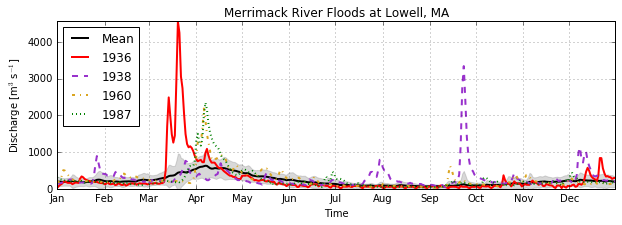

In [160]:
#Plots all data
fig = plt.figure(figsize=(10, 3))  
ax = fig.add_subplot(111)  

ax.plot(newdates,varmean,color='k',ls='-',lw=2)
ax.plot(newdates,allvars[int(i[0])],'r',lw=2)
ax.plot(newdates,allvars[int(i[1])],color='darkorchid',ls='--',lw=2)
ax.plot(newdates,allvars[int(i[2])],color='goldenrod',ls='-.',lw=2)
ax.plot(newdates,allvars[int(i[3])],color='g',ls=':',lw=2)
ax.fill_between(newdates,varmean-varstat,varmean+varstat,color='gray',alpha=0.3)

ax.set_xlim(np.min(newdates),np.max(newdates))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
ax.set_ylim(0,np.max(var1))
ax.legend(('Mean','1936','1938','1960','1987'),loc=2)
ax.set_ylabel('Discharge [m$^{3}$ s$^{-1}$]')
ax.set_xlabel('Time')
ax.set_title('Merrimack River Floods at Lowell, MA')
ax.grid(True,color='k',ls=':',alpha=0.7)

### 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

In [5]:
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

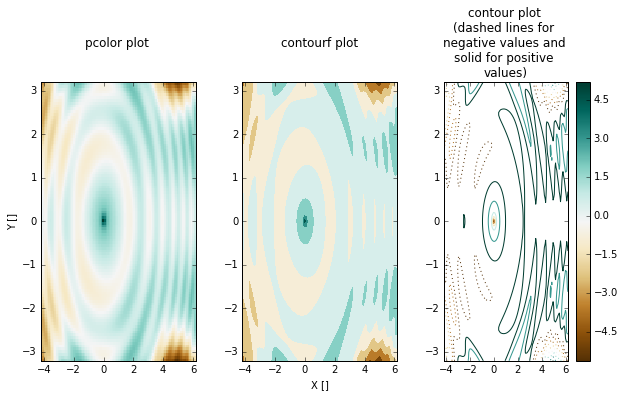

In [26]:
fig = plt.figure(figsize=(10,5)) 
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(131)  
ax1.pcolor(X,Y,Z,cmap=cm.BrBG)
ax1.axis('equal')
ax1.axis('tight')
ax1.set_title('pcolor plot \n\n')
ax1.set_ylabel('Y []')

ax2 = fig.add_subplot(132)
ax2.contourf(X,Y,Z,cmap=cm.BrBG)
ax2.axis('equal')
ax2.axis('tight')
ax2.set_title('contourf plot\n\n')
ax2.set_xlabel('X []')

ax3 = fig.add_subplot(133)
ax3.set_title('contour plot \n(dashed lines for \nnegative values and \nsolid for positive \nvalues)')
cond=Z>0
neg = np.ma.masked_where(cond, Z) #masks positive values
ax3.contour(X,Y,-neg,linestyles=':',cmap=cm.BrBG)

cond2=Z<0
pos = np.ma.masked_where(cond2, Z) #masks negative values
ax3.contour(X,Y,-pos,linestyles='-',cmap=cm.BrBG)
ax3.axis('equal')
ax3.axis('tight')
mappable = ax1.pcolormesh(X,Y,Z,cmap=cm.BrBG)
fig.colorbar(mappable)


### 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

In [162]:
f=open('/Users/KatieHutschenreuter/Desktop/python4geosciences/data/MCH/m1001a.cnv2')

#for line in f.readlines():
#       print(line)

In [163]:
ob = np.loadtxt('/Users/KatieHutschenreuter/Desktop/python4geosciences/data/MCH/m1001a.cnv2',skiprows=57)


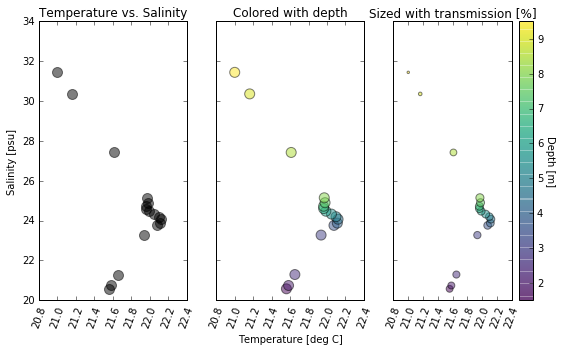

In [167]:
temp=ob[:,2] #deg C
salt=ob[:,5] #psu
depth=ob[:,1] #meters
trans=ob[:,9] #percent

fig = plt.figure(figsize=(9,5)) 
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(131)
ax1.scatter(temp,salt,s=100,alpha=0.5,color='k')
ax1.set_title('Temperature vs. Salinity')
ax1.set_ylabel('Salinity [psu]')
plt.xticks(rotation=70)

ax2 = fig.add_subplot(132)
ax2.scatter(temp,salt,s=100,c=depth,alpha=0.5,cmap='viridis')
ax2.set_title('Colored with depth')
ax2.set_xlabel('Temperature [deg C]')
ax2.set_yticklabels('')
plt.xticks(rotation=70)

ax3 = fig.add_subplot(133) 
sc = ax3.scatter(temp,salt,s=trans,c=depth,alpha=0.5,cmap='viridis')
ax3.set_title('Sized with transmission [%]')
ax3.set_yticklabels('')
ax3.set_ylim(20,34)
ax3.set_xlim(20.8,22.4)
plt.xticks(rotation=70)

cbar = plt.colorbar(sc)
cbar.set_label('Depth [m]',rotation=270,labelpad=12)


### 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

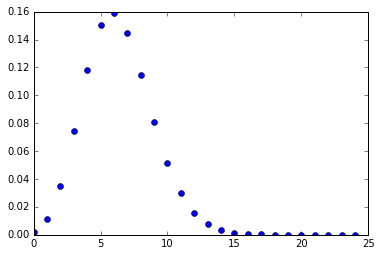

In [237]:
from scipy.stats import poisson
#Got multiple errors from loading the other way so I saved the data as
#a txt file within the data folder and loaded it in that way.
burl = np.loadtxt('../data/Hist_data.txt')
wind_speed = burl[:, 6]

mu = np.mean(wind_speed)
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(0,25)
plt.plot(x, poisson.pmf(x, mu),'bo', label='poisson pmf')


In [ ]:
p = poisson.pmf

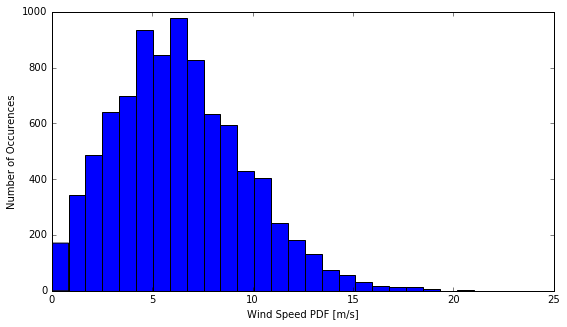

In [238]:
fig = plt.figure(figsize=(9,5)) 
ax1 = fig.add_subplot(111)
a = ax1.hist(wind_speed,bins=25)
ax1.set_xlabel('Wind Speed PDF [m/s]')
ax1.set_ylabel('Number of Occurences')


I think this distribution looks a lot like a poison distribution. I could only figure out how to compute the stats of the poisson distibution on the wind speed data not on the data plotted on the histogram. The shape of the poisson data for wind speed is shown on the top plot.

### 5. (Grad) Fit and line and plot

Load in the Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
    years = mauna_loa_co2[:, 0]
    months = mauna_loa_co2[:, 1]
    co2 = mauna_loa_co2[:, 4]


Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO$_2$ in the year 2100. Which prediction do you think is most accurate?

In [164]:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

The CO2 emissions in the year 2100 are estimated as:
 521.351583401 by a first degree polynomial,
 672.808985579 by a second degree polynomial,
 -570.233217239 by a fifth degree polynomial


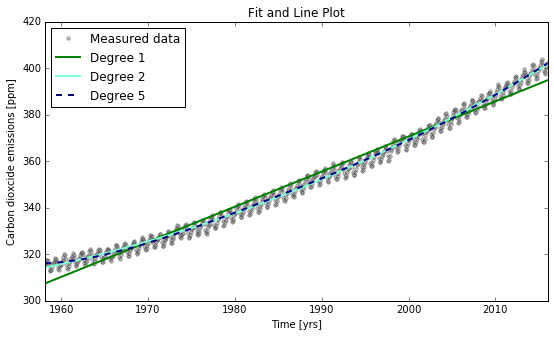

In [166]:
day=np.ones(len(years))
xdate=[]
for i,yr in enumerate(years):
    xdate.append(datetime(int(yr),int(months[i]),int(day[i])))

x = np.linspace(years[0],years[len(years)-1],len(years))
p1 = np.polyfit(x, co2, 1)
y1 = p1[0]*x +p1[1]
est1=p1[0]*2100 +p1[1]

p2 = np.polyfit(x,co2,2)
y2 = p2[0]*(x**2)+p2[1]*x+p2[2]
est2=p2[0]*(2100**2)+p2[1]*2100+p2[2]

p5 = np.polyfit(x,co2,5)
y5 = p5[0]*(x**5)+p5[1]*(x**4)+p5[2]*(x**3)+p5[3]*(x**2)+p5[4]*(x)+p5[5]
est3=p5[0]*(2100**5)+p5[1]*(2100**4)+p5[2]*(2100**3)+p5[3]*(2100**2)+p5[4]*(2100)+p5[5]

fig = plt.figure(figsize=(9,5)) 
ax = fig.add_subplot(111)
ax.plot(xdate,co2,'.',ms=7,alpha=0.5,color='0.5',markeredgecolor='k')
ax.plot(xdate,y1,color='g',lw=2,ls='-')
ax.plot(xdate,y2,'aquamarine',ls='-',lw=2)
ax.plot(xdate,y5,'navy',lw=2,ls='--')
ax.set_xlabel('Time [yrs]')
ax.set_ylabel('Carbon dioxcide emissions [ppm]')
ax.set_title('Fit and Line Plot')
ax.legend(('Measured data','Degree 1','Degree 2','Degree 5'),loc=0,numpoints=1)

print('The CO2 emissions in the year 2100 are estimated as:\n',est1,'by a first degree polynomial,\n',est2,'by a second degree polynomial,\n',est3,'by a fifth degree polynomial')

The most accurate prediction of the co2 rise is the second degree polynomial. It can be seen from the plot that the data is not increasing linearly and the second and fifth degree polynomials seem to fit the data well over the observed period. When the time frame is expanded the second degree polynomial continues to increase following the trend while the fifth degree polynomial reaches a max and starts to degree to large negative values.

### 6. (Grad) Make a movie

Make a movie of annual mean surface air temperature predictions from the AR4 model. Data are found in `data/surface_temp_predictions.npz`. Load the data using

    lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz')['arr_0']

The `['arr_0']` is needed because of the way zipped `npz` files store data; see the docstring for `np.savez`. If that doesn't work (if you get an 'ordinal not in range error), you will need to explicilty specify the encoding:

    lat, lon, sst = np.load('python4geosciences/data/surface_temp_predictions.npz', encoding='latin1')['arr_0']

(The source for the data can be found [here](http://nomads.ncdc.noaa.gov/thredds/dodsC/gfdlcm2x/Stable2000/tas_A1.200101-210012.nc.html)).
Make sure your movie includes some representation of the earth (like coastlines), includes a colorbar, along with other appropriate labels.

The process will be to create a loop that creates a series of frames, labeled `frame_003.png`, for example. You will want to create a string for the filename using some code like this:

    frame_name = 'frame_%03d' % frame_number

Use [ffmpeg](https://www.ffmpeg.org) to stitch the frames together to create an H264 animation that can be played by quicktime. I use a command like this:

    $ ffmpeg -y -r 10 -i frames_%04d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

where the options mean

    -y                  Overwrite old file
    
    -r 10               Play 10 frames per second
    
    -c:v libx264        Use the H264 library
    
    -crf 15             Use a compression factor of 15 (0=lossless, 51=poor.)
                        Quicktime cannot play lossless encoded movies. 15 appears to be reasonable.

    -pix_fmt yuv420p    Special command so that quicktime can play the movie.  Note, this requires
                        an even number of pixels.  If you don't have this, you can use convert to 
                        crop a pixel off edge of the image.

See [this page]https://trac.ffmpeg.org/wiki/x264EncodingGuide for more information.    

In [ ]:
#Used to install ffmpeg in command window
brew install ffmpeg 

In [2]:
lon, lat, mean_surf_temp = np.load('../data/surface_temp_predictions.npz',encoding='latin1')['arr_0']

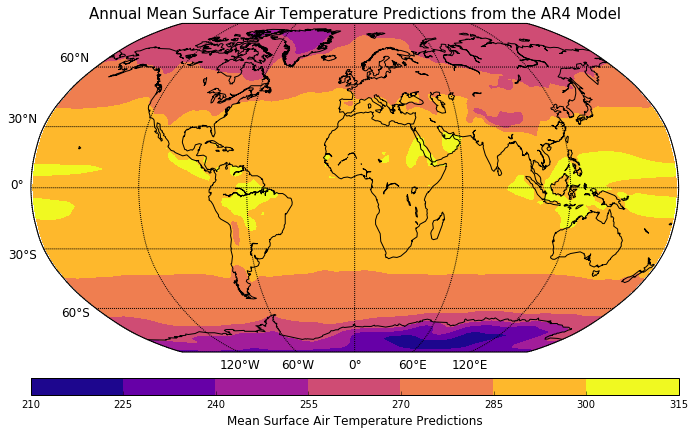

In [3]:
#Option 2: with pcolormesh
#Option 3: with contourf - seems easier to see the motion from frame to frame


lonlat=np.meshgrid(lon,lat)

dmin=min(mean_surf_temp.flat)
dmax=max(mean_surf_temp.flat)

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0.05,0.05,0.9,0.9])

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0],fontsize=12)
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=12)

im1 = m.contourf(lonlat[0],lonlat[1],mean_surf_temp[0,:,:],cmap='plasma',latlon=True,vmin=dmin,vmax=dmax)
cb = m.colorbar(im1,"bottom", size="5%", pad="8%")

cb.set_label('Mean Surface Air Temperature Predictions',fontsize=12)
ax.set_title('Annual Mean Surface Air Temperature Predictions from the AR4 Model',fontsize=15)

plt.show()

In [4]:
#Loops through option 3

for frame_number in np.arange(0,mean_surf_temp.shape[0]):    
    lonlat=np.meshgrid(lon,lat)

    dmin=min(mean_surf_temp.flat)
    dmax=max(mean_surf_temp.flat)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes([0.05,0.05,0.9,0.9])

    m = Basemap(projection='robin',lon_0=0,resolution='c')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0],fontsize=12)
    m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=12)

    im1 = m.contourf(lonlat[0],lonlat[1],mean_surf_temp[frame_number,:,:],cmap='plasma',latlon=True,vmin=dmin,vmax=dmax)
    cb = m.colorbar(im1,"bottom", size="5%", pad="8%")

    cb.set_label('Mean Surface Air Temperature Predictions',fontsize=12)
    ax.set_title('Annual Mean Surface Air Temperature Predictions from the AR4 Model',fontsize=15)

    frame_name = 'frame_%03d' % frame_number
    
    fig.savefig('../data/HW04_Problem6_3/'+frame_name+'.png')
    plt.close(fig)


In [3]:
#Code to make the movie
#Ran it in command window

ffmpeg -y -r 10 -pattern_type glob -i '*.png' -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4